## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## DataSet Upload

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MBTI 500.csv') 

## Data Preview 

In [4]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


## List Of Post 

In [6]:
[p.split('|||') for p in data.head(1).posts.values]

[['know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low 

## Distribution of the MBTI personality types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


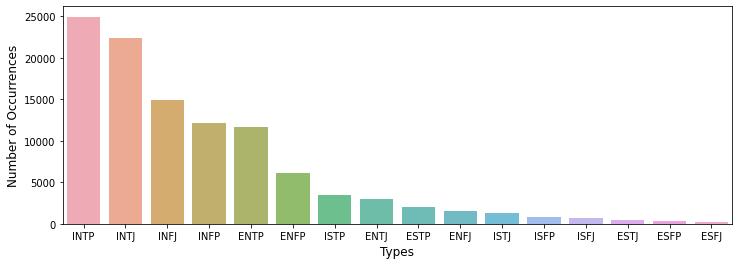

In [7]:
per_types = data['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(per_types.index, per_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [8]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,posts,type,IE,NS,TF,JP
0,know intj tool use interaction people excuse a...,INTJ,1,1,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,1,1,1,1
2,preferably p hd low except wew lad video p min...,INTJ,1,1,1,1
3,drink like wish could drink red wine give head...,INTJ,1,1,1,1
4,space program ah bad deal meing freelance max ...,INTJ,1,1,1,1


In [9]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 25390  /  80677
Intuition (N) / Sensing (S):		 9201  /  96866
Thinking (T) / Feeling (F):		 36864  /  69203
Judging (J) / Perceiving (P):		 61632  /  44435


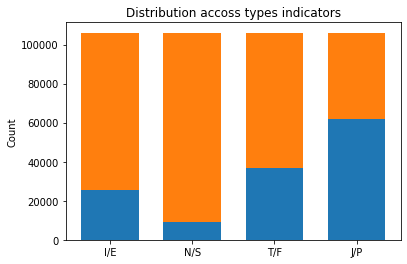

In [10]:
N = 4
but = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

##Pearson Features Correlation

In [13]:
corr=data[['IE','NS','TF','JP']].corr()

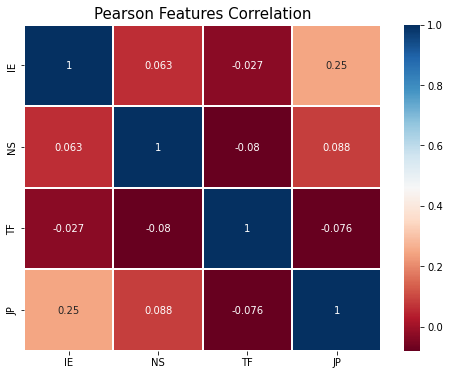

In [14]:
cmap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

## Prep Data 

In [15]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality

    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

d = data.head(10)
print(d)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

                                               posts  type  IE  NS  TF  JP
0  know intj tool use interaction people excuse a...  INTJ   1   1   1   1
1  rap music ehh opp yeah know valid well know fa...  INTJ   1   1   1   1
2  preferably p hd low except wew lad video p min...  INTJ   1   1   1   1
3  drink like wish could drink red wine give head...  INTJ   1   1   1   1
4  space program ah bad deal meing freelance max ...  INTJ   1   1   1   1
5  loose stop overthinking everything ruin friend...  INTJ   1   1   1   1
6  often men one put chance get burn otherwise no...  INTJ   1   1   1   1
7  early definitely relate quiet self destruction...  INTJ   1   1   1   1
8  one full list would impossibly long quotable f...  INTJ   1   1   1   1
9  technique information power share unless absol...  INTJ   1   1   1   1
Binarize MBTI list: 
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


##Preprocessing posts
1.   Remove urls
2.   Keep only words and put everything lowercase
1.   Lemmatize each word

In [16]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:

##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize

# We want to remove these from the psosts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 10000 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [18]:
list_posts, list_personality  = pre_process_data(data, remove_stop_words=True)

1 of 106067 rows
10000 of 106067 rows
20000 of 106067 rows
30000 of 106067 rows
40000 of 106067 rows
50000 of 106067 rows
60000 of 106067 rows
70000 of 106067 rows
80000 of 106067 rows
90000 of 106067 rows
100000 of 106067 rows
106067 of 106067 rows


In [19]:
print("Num posts and personalities: ",  list_posts.shape, list_personality.shape)

Num posts and personalities:  (106067,) (106067, 4)


In [20]:
list_posts[1]

'rap music ehh opp yeah know valid well know fact people like socialize party even personality let alone personality type reason remain mystery likely function stack see party goer barely function function stack well fact even get two together nigh impossible lead entire personality consist shadow function though theorize widely dismiss though may help explain inherent love night life like something stop apply eliminate genuine character flaw quickly notice rationalisation vote trump basically hillary attractive candidate lacklustre corrupt beg question president racist sexist bad really care le either way judge quality popularity stop pussy something swing go bar pick random one night stand also apps like tinder casual sex unattractive time energy relationship hire prostitute kind thing appeal masturbate use pornography imagination choice want commit relationship give advice think cover option take point realize spend much time try educate win topic reason waste energy even inflammato

In [21]:
list_personality[1]

array([0, 0, 1, 0])

##Vectorize with count and tf-idf

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
countizer = CountVectorizer(analyzer="word", max_features=1500, tokenizer=None, preprocessor=None, stop_words=None,max_df=0.7,min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = countizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [24]:
feature_names = list(enumerate(countizer.get_feature_names()))
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'activity'),
 (9, 'actual'),
 (10, 'actually'),
 (11, 'add'),
 (12, 'advice'),
 (13, 'affect'),
 (14, 'afraid'),
 (15, 'age'),
 (16, 'ago'),
 (17, 'agree'),
 (18, 'ahough'),
 (19, 'allow'),
 (20, 'almost'),
 (21, 'alone'),
 (22, 'along'),
 (23, 'already'),
 (24, 'always'),
 (25, 'amaze'),
 (26, 'amount'),
 (27, 'amp'),
 (28, 'angry'),
 (29, 'annoy'),
 (30, 'another'),
 (31, 'answer'),
 (32, 'anxiety'),
 (33, 'anymore'),
 (34, 'anyone'),
 (35, 'anything'),
 (36, 'anyway'),
 (37, 'apply'),
 (38, 'appreciate'),
 (39, 'approach'),
 (40, 'area'),
 (41, 'argue'),
 (42, 'argument'),
 (43, 'around'),
 (44, 'art'),
 (45, 'ask'),
 (46, 'aspect'),
 (47, 'assume'),
 (48, 'attempt'),
 (49, 'attention'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'back'),
 (56, 'bad'),
 (57, 'balance'),
 (58, 'base'),
 (59, 'basically'),


In [25]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05603912 0.04272581
 0.         0.         0.         0.         0.         0.04805134
 0.03055854 0.         0.         0.0702423  0.         0.
 0.04138221 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05998184 0.         0.         0.         0.         0.
 0.         0.06072385 0.         0.         0.04670153 0.
 0.         0.         0.06915334 0.         0.04662289 0.
 0.         0.         0.04100042 0.         0.         0.
 0.         0.         0.07258887 0.03498714 0.         0.
 0.         0.         0.         0.         0.         0.
 0.05066836 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1406639
 0.04928546 0.         0.         0.         0

In [26]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [27]:
print("MBTI row: %s" % translate_back(list_personality[30000,:]))
print("Y: Binarized MBTI row: %s" % list_personality[30000,:])

MBTI row: INTP
Y: Binarized MBTI row: [0 0 1 1]


##First XGBoost model for MBTI dataset

In [28]:
 Y = list_personality[:,l]
 Y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# First XGBoost model for MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1211)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.73%
NS: Intuition (N) / Sensing (S) ...
* NS: Intuition (N) / Sensing (S) Accuracy: 91.88%
FT: Feeling (F) / Thinking (T) ...


##Predict Personality Type
*   Get data
*   Fit and predict the 4 type indicators
*   Show result

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as snstwitter
import pandas as pn

In [ ]:
query='(from:elonmusk) until:2021-01-01 since:2017-01-01'
tweets=[]
limit=5000

for tweet in snstwitter.TwitterSearchScraper(query).get_items():
   if len(tweets) == limit:
     break
   else:
     tweets.append([tweet.date, tweet.username , tweet.content])

df = pn.DataFrame(tweets, columns=['Date','User', 'Tweeets'])

 
df

,Date,User,Tweeets
0,2020-12-31 05:47:38+00:00,elonmusk,Ignore the heading
1,2020-12-31 05:40:26+00:00,elonmusk,Great interview with Mathias Döpfner\nhttps://...
2,2020-12-31 05:19:34+00:00,elonmusk,@jack 🎩 The Greatest Gatsby 🎩
3,2020-12-31 02:25:06+00:00,elonmusk,@flcnhvy Inspired by the ballet
4,2020-12-31 01:55:32+00:00,elonmusk,@smvllstvrs @ErcXspace Rocket motion is primar...
...,...,...,...
4995,2019-05-12 12:20:29+00:00,elonmusk,@gorosart Ok
4996,2019-05-12 03:32:31+00:00,elonmusk,@johnsontoddr4 @gorosart Completely agree. Eve...
4997,2019-05-12 03:02:08+00:00,elonmusk,@PPathole @SpaceX It is flat-packed. No dispen...
4998,2019-05-12 01:59:13+00:00,elonmusk,@ampontour That *might* not be my lucky 🍀 number


In [ ]:
data = df.iloc[:,2]
data

0                                      Ignore the heading
1       Great interview with Mathias Döpfner\nhttps://...
2                           @jack 🎩 The Greatest Gatsby 🎩
3                         @flcnhvy Inspired by the ballet
4       @smvllstvrs @ErcXspace Rocket motion is primar...
                              ...                        
4995                                         @gorosart Ok
4996    @johnsontoddr4 @gorosart Completely agree. Eve...
4997    @PPathole @SpaceX It is flat-packed. No dispen...
4998     @ampontour That *might* not be my lucky 🍀 number
4999    More details on day of launch, currently track...
Name: Tweeets, Length: 5000, dtype: object

In [ ]:
my_posts = []

for word in data:
  my_posts.append(word)

my_posts  

['Ignore the heading',
 'Great interview with Mathias Döpfner\nhttps://t.co/ewnaHc4cH0',
 '@jack 🎩 The Greatest Gatsby 🎩',
 '@flcnhvy Inspired by the ballet',
 '@smvllstvrs @ErcXspace Rocket motion is primarily vertical, so you want the top open',
 '@jack Let’s make the roaring 20’s again!',
 '@Erdayastronaut Might be a few lumps along the way',
 '@Erdayastronaut @flcnhvy @ErcXspace Production is hard, prototypes are easy. Building ~1000 Starships to create a self-sustaining city on Mars is our mission.',
 '@ICannot_Enough @AloysiusFekete @RationalEtienne @biogirl09 @ErcXspace Exactly',
 '@RexChapman Haha',
 '@Erdayastronaut @flcnhvy @ErcXspace SN9 will press CH4 header tank with helium. Long-term solution is under debate. Not clear what is lightest/simplest.',
 '@flabellina212 @RationalEtienne @biogirl09 @ErcXspace Yes',
 '@RationalEtienne @biogirl09 @ErcXspace Legs would certainly work, but best part is no part, best step is no step',
 '@flcnhvy @ErcXspace Yes',
 '@flcnhvy @ErcXspace

In [ ]:
my_X_cnt = countizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
my_X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result = []
# # Let's train type indicator individually
for l in range(len(type_indicators)):
     print("%s ..." % (type_indicators[l]))
    
Y = list_personality[:,l]

    # split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

     # fit model on training data
model = XGBClassifier(**param)
model.fit(X_train, y_train)
    
#     # make predictions for my  data
y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])
print("... %s prediction: %s" % (type_indicators[l], y_pred))

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) / Sensing (S) ...
FT: Feeling (F) / Thinking (T) ...
JP: Judging (J) / Perceiving (P) ...
... JP: Judging (J) / Perceiving (P) prediction: [1 1 1 ... 1 1 1]


In [ ]:
print("The result is: ", translate_back(result))

The result is:  E


**Instance-2**

In [ ]:
query='(from:urstrulyachu297) until:2021-01-01 since:2017-01-01'
tweets=[]
limit=5000

for tweet in snstwitter.TwitterSearchScraper(query).get_items():
   if len(tweets) == limit:
     break
   else:
     tweets.append([tweet.date, tweet.username , tweet.content])

df1 = pn.DataFrame(tweets, columns=['Date','User', 'Tweeets'])

 
df1

,Date,User,Tweeets
0,2020-12-31 17:06:51+00:00,narendramodi,An irreparable loss! Colonel Narendra 'Bull' K...
1,2020-12-31 15:33:13+00:00,narendramodi,"On the first day of 2021, will be taking part ..."
2,2020-12-31 10:50:13+00:00,narendramodi,"अगर 2020 Health Challenges का साल था, तो 2021 ..."
3,2020-12-31 10:49:54+00:00,narendramodi,देश में मेडिकल एजुकेशन को बढ़ावा देने के लिए म...
4,2020-12-31 10:47:23+00:00,narendramodi,मैंने देखा है कि घर के बड़े व्यक्ति इसलिए इलाज...
...,...,...,...
4995,2019-05-02 09:18:55+00:00,narendramodi,Congratulations to all my young friends who ha...
4996,2019-05-01 16:11:34+00:00,narendramodi,Today is a day that would make every Indian pr...
4997,2019-05-01 14:39:09+00:00,narendramodi,Congress’ corruption and nepotism has ruined R...
4998,2019-05-01 14:06:03+00:00,narendramodi,"आस्था और पर्यटन पर सबसे बड़ा खतरा होता है, आतं..."


In [ ]:
data1 = df1.iloc[:,2]
data1

0       An irreparable loss! Colonel Narendra 'Bull' K...
1       On the first day of 2021, will be taking part ...
2       अगर 2020 Health Challenges का साल था, तो 2021 ...
3       देश में मेडिकल एजुकेशन को बढ़ावा देने के लिए म...
4       मैंने देखा है कि घर के बड़े व्यक्ति इसलिए इलाज...
                              ...                        
4995    Congratulations to all my young friends who ha...
4996    Today is a day that would make every Indian pr...
4997    Congress’ corruption and nepotism has ruined R...
4998    आस्था और पर्यटन पर सबसे बड़ा खतरा होता है, आतं...
4999    एनडीए की सरकार ने परिश्रमी श्रमिकों की चिंता क...
Name: Tweeets, Length: 5000, dtype: object

In [ ]:
my_posts1 = []

for word in data1:
  my_posts1.append(word)

my_posts1  

["An irreparable loss! Colonel Narendra 'Bull' Kumar (Retired) served the nation with exceptional courage and diligence. His special bond with the mountains will be remembered. Condolences to his family and well wishers. Om Shanti. https://t.co/hTQvGJobxM",
 'On the first day of 2021, will be taking part in a programme aimed at transforming India’s urban landscape. Will lay the foundation stone of Light House Projects and distribute PMAY (Urban) and ASHA-India awards. Join Live at 11 AM. https://t.co/Eu3qx8xRVC',
 'अगर 2020 Health Challenges का साल था, तो 2021 Health Solutions का साल होने वाला है और इसमें भारत का योगदान महत्वपूर्ण रहेगा। https://t.co/0NRYupr19q',
 'देश में मेडिकल एजुकेशन को बढ़ावा देने के लिए मिशन मोड पर काम चल रहा है।\n\nलक्ष्य यह है कि हर राज्य तक AIIMS पहुंचे और हर 3 लोकसभा क्षेत्र के बीच एक मेडिकल कॉलेज हो।\n\nइन्हीं प्रयासों का परिणाम है कि बीते 6 साल में MBBS की 31 हजार और PG में 24 हजार नई सीटें बढ़ाई गई हैं। https://t.co/MWONIRSnc5',
 'मैंने देखा है कि घर के बड

In [ ]:
my_X_cnt1 = countizer.transform(my_posts1)
my_X_tfidf1 =  tfizer.transform(my_X_cnt1).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result1 = []
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1212)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred1 = model.predict(my_X_tfidf1)
    result1.append(y_pred1[0])
    print("... %s prediction: %s" % (type_indicators[l], y_pred1))

IE: Introversion (I) / Extroversion (E) ...
... IE: Introversion (I) / Extroversion (E) prediction: [0 0 0 ... 0 0 0]
NS: Intuition (N) / Sensing (S) ...
... NS: Intuition (N) / Sensing (S) prediction: [0 0 0 ... 0 0 0]
FT: Feeling (F) / Thinking (T) ...
... FT: Feeling (F) / Thinking (T) prediction: [1 1 1 ... 1 1 1]
JP: Judging (J) / Perceiving (P) ...
... JP: Judging (J) / Perceiving (P) prediction: [1 1 1 ... 1 1 1]


In [ ]:
print("The result is: ", translate_back(result1))

The result is:  INTP


In [ ]:
query='(from:mohmaaya) until:2021-01-01 since:2017-01-01'
tweets=[]
limit=5000

for tweet in snstwitter.TwitterSearchScraper(query).get_items():
   if len(tweets) == limit:
     break
   else:
     tweets.append([tweet.date, tweet.username , tweet.content])

df1 = pn.DataFrame(tweets, columns=['Date','User', 'Tweeets'])

 
df1

KeyboardInterrupt: ignored